# CLASIFICACIÓN DE TUMORES DE TEJIDOS MAMARIOS USANDO TÉCNICAS DE MACHINE LEARNING

Primero se instalará la librería que permite la lectura de tablas de excel en python.

In [1]:
!pip install xlrd


Se clona la carpeta de github para obtener la data

In [2]:
!git clone 'https://github.com/vcadillog/Machine-Learning-MT616.git'

Cloning into 'Machine-Learning-MT616'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


#EXTRACCIÓN DE LA DATA
La data se encuentra alojado en el repositorio UCI y se realiza la conversión de la tabla  usando la librería pandas.
La data tiene datos etiquetados con 6 tipos de tumores presentes en el tejido mamario.

1. Carcinoma
2. Fibroadenoma
3. Mastopatia
4. Glandular
5. Conectivo
6. Adiposo





Se han renombrado 2 características, por contener caractéres que dificultan las operaciones con pandas.

In [4]:
from google.colab import drive
drive.mount('/content/drive_all')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive_all


In [0]:
import pandas as pd

datafile='/content/drive_all/My Drive/PYTHON/PC3-4/Cadillo/BreastTissue.xls'
data=pd.read_excel(datafile,'Data')
data.head()
data['A']=data['A/DA']
data['MaxIP']=data['Max IP']
data=data.drop(columns=['A/DA','Max IP','Case #'])
feature_names=['I0'	,'PA500',	'HFS'	,'DA'	,'Area'	,'A',	'MaxIP', 'DR',	'P']




Ploteo de la correlación de las características de 2 a 2.

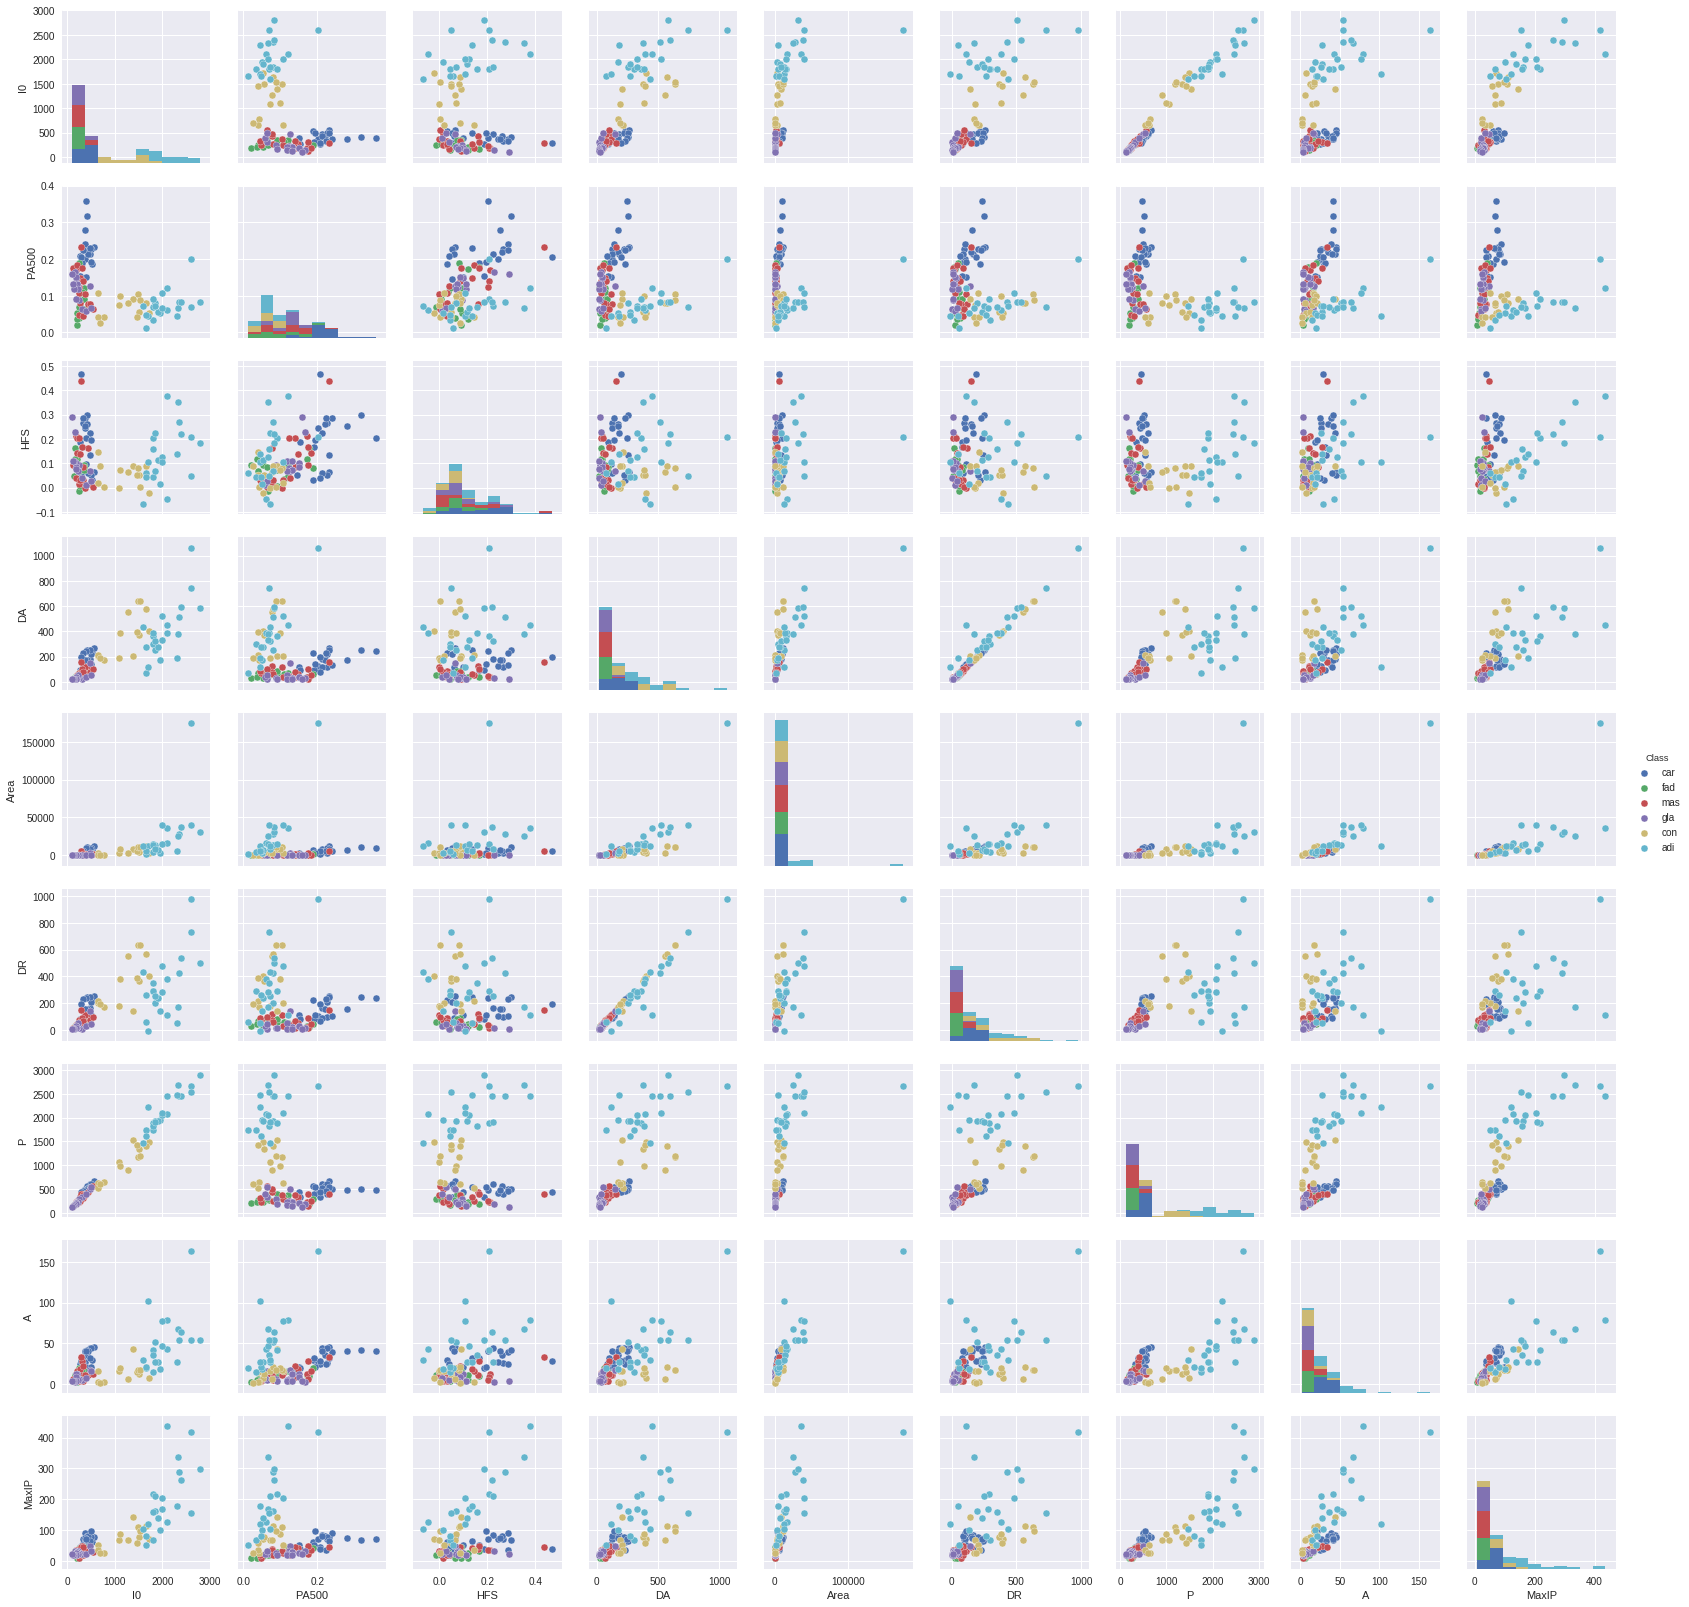

In [7]:
import seaborn as sns
g = sns.pairplot(data, hue="Class")

Separación de la data para el entrenamiento y prueba por cross-validation, con un tamaño de data de prueba del 40%.

In [0]:
import numpy as np
X = data.drop('Class',axis=1).values
y = data['Class'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Pre procesamiento de la data usando el escalamiento estándar.

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# CLASIFICACIÓN POR EL K VECINO MÁS CERCANO (KNN)

Es un método de clasificación no paramétrico en el cual un punto toma la etiqueta de los puntos que más aparecen en su proximidad, también se puede usar para regresión de datos.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#Inicialización de vectores
neighbors = np.arange(1,10)
knn_train_accuracy =np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))
distance=2

for i,k in enumerate(neighbors):
    #Actualización del clasificador
    knn = KNeighborsClassifier(n_neighbors=k,p=distance)
    
    #Entrenamiento del modelo
    knn.fit(X_train, y_train)
    
    #Cómputo de la precisión del modelo en los datos de entrenamiento
    knn_train_accuracy[i] = knn.score(X_train, y_train)
    
    #Cómputo de la precisión del modelo en los datos de prueba
    knn_test_accuracy[i] = knn.score(X_test, y_test) 
    
#Se extrae el indice del modelo que da la mayor precisión
iknnmax=np.argmax(knn_test_accuracy)+1

Ploteo de la precisión del modelo vs la cantidad de vecinos más cercanos.

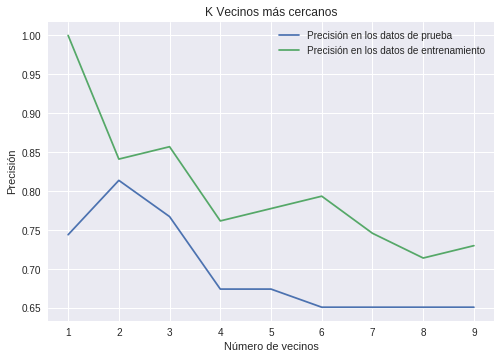

In [14]:
import matplotlib.pyplot as plt
plt.title('K Vecinos más cercanos')
plt.plot(neighbors, knn_test_accuracy, label='Precisión en los datos de prueba')
plt.plot(neighbors, knn_train_accuracy, label='Precisión en los datos de entrenamiento')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=iknnmax,p=distance)
knn.fit(X_train,y_train)
print('La precisión por {0} vecinos es: {1}'.format(iknnmax,knn.score(X_test,y_test)))

La precisión por 2 vecinos es: 0.813953488372093


#ÁRBOLES DE DECISIÓN

Es un modelo predictivo que organiza los datos en diagramas lógicos-secuenciales.

Se ha elegido la métrica de impureza de Gini, la impureza de Gini indica que tan recurrente se da un etiquetado incorrecto, cuando el elemento y la etiqueta son elegidos aleatoriamente.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Inicialización de vectores
nodos = np.arange(2,11)
td_train_accuracy =np.empty(len(nodos))
td_test_accuracy = np.empty(len(nodos))

for i,k in enumerate(nodos):
    #Actualización del clasificador
    td_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=10, min_samples_leaf=2,max_leaf_nodes=k)
    
    #Entrenamiento del modelo
    td_gini.fit(X_train, y_train)
    
    #Cómputo de la precisión del modelo en los datos de entrenamiento
    td_train_accuracy[i] = td_gini.score(X_train, y_train)
    
    #Cómputo de la precisión del modelo en los datos de prueba
    td_test_accuracy[i] = td_gini.score(X_test, y_test) 
itdmax=np.argmax(td_test_accuracy)+2

Ploteo de la precisión del modelo vs la cantidad de nodos del árbol

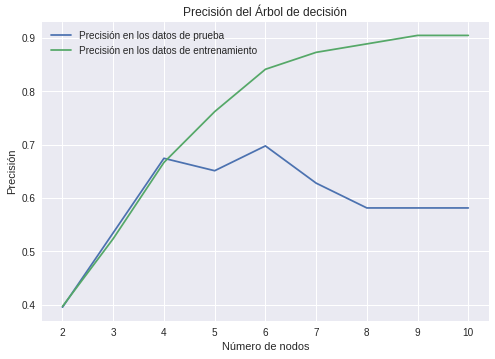

In [17]:
import matplotlib.pyplot as plt
plt.title('Precisión del Árbol de decisión')
plt.plot(nodos, td_test_accuracy, label='Precisión en los datos de prueba')
plt.plot(nodos, td_train_accuracy, label='Precisión en los datos de entrenamiento')
plt.legend()
plt.xlabel('Número de nodos')
plt.ylabel('Precisión')
plt.show()

In [0]:
print('Precisión del árbol de decisión para {0} nodos es: {1}'.format(itdmax,max(td_test_accuracy)))


Precisión del árbol de decisión para 6 nodos es: 0.6976744186046512


# MÁQUINA DE VECTORES DE SOPORTE (SVM)

Es un método que construye un hiperplano óptimo de separación entre dos puntos más cercanos al vector de soporte que separa las dos clases o logra una regresión.

Cuando la data no es linealmente separable, se usa una herramienta que permite su separación al transformar el espacio aumentando su dimensión y así encontrar un hiperplano óptimo.

In [18]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
sup = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
sup.fit(X_train, y_train)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",sup.score(X_test, y_test))

Accuracy: 0.6744186046511628


# COMPARACIÓN DE PRECISIÓN ENTRE LOS MÉTODOS

# Nueva sección

In [20]:
print('La precisión con SVM es                 :',sup.score(X_test, y_test))
print('La precisión con Árboles de decisión es :',max(td_test_accuracy))
print('La precisión con KNN es                 :',max(knn_test_accuracy))

La precisión con SVM es                 : 0.6744186046511628
La precisión con Árboles de decisión es : 0.6976744186046512
La precisión con KNN es                 : 0.813953488372093
